Processing simulation dataframes from pcr_sim.py
Since some of these "molecular dynamics" can take a really long, time it's better to run once and then save the results as data files to be plotted afterwards.

First just plot the simulation of one condition with ten replicates to demonstrate the degree of stochasticity for one starting initial condition.

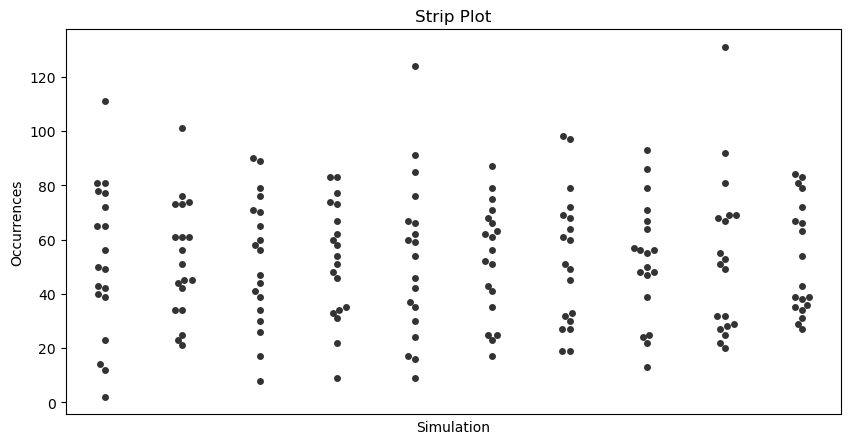

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sim_var_same = pd.read_csv('sim_umi_seq/umi_20mol_70eff_30cycles_1000seq.tsv', sep='\t')

plt.figure(figsize=(10, 5))
sns.swarmplot(data=sim_var_same, x='Simulation', y='Occurrences',color='.2')
plt.xticks([])
plt.title('Strip Plot')
plt.savefig('umi_sim_stripplot.pdf')


Now going to process the UMI simulations to demonstrate that rank abundance is perserved even with low number of sequences despite this randomness

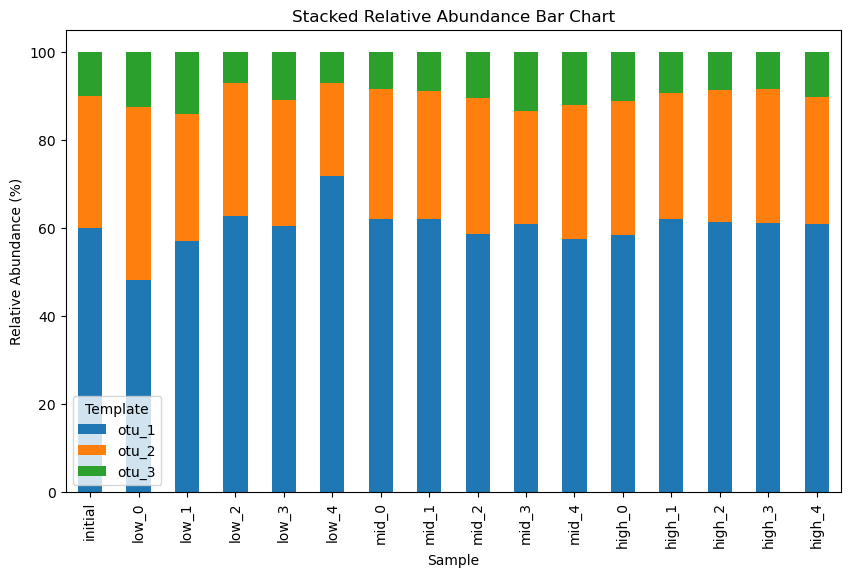

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

def plot_rel_abund(df,name,order):
    pivot_df = df.pivot(index='Simulation', columns='Template', values='Occurrences').fillna(0)
    
    # Calculate relative abundances
    relative_abundance_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

    relative_abundance_df = relative_abundance_df.reindex(order)

    # Plot stacked bar chart
    ax = relative_abundance_df.plot(kind='bar', stacked=True, figsize=(10, 6))

    # Set labels and title
    ax.set_xlabel('Sample')
    ax.set_ylabel('Relative Abundance (%)')
    ax.set_title('Stacked Relative Abundance Bar Chart')

    # Show the plot
    plt.savefig(name+'.pdf')

# Create a sample DataFrame
initial_data = {
    'Template': ['otu_3', 'otu_2', 'otu_1'],
    'Occurrences': [1, 3, 6],
    'Simulation': ['initial', 'initial', 'initial']
}

initial = pd.DataFrame(initial_data)

low = pd.read_csv('sim_pcr_seq/low_uneven-1-3-6_70eff_20cycles_1000seq.tsv', sep='\t')
mid = pd.read_csv('sim_pcr_seq/mid_uneven-10-30-60_70eff_20cycles_1000seq.tsv', sep='\t')
high = pd.read_csv('sim_pcr_seq/high_uneven-100-300-600_70eff_20cycles_1000seq.tsv', sep='\t')

tot = pd.concat([initial,low,mid,high])

column_order = ['initial','low_0','low_1','low_2','low_3','low_4','mid_0','mid_1','mid_2','mid_3','mid_4','high_0','high_1','high_2','high_3','high_4']

low_plot = plot_rel_abund(tot,'low_mid_high_umi_sim_rank',column_order)

Processing figures for effect of PCR efficiency and cycle num for supplementary figures... may not need it though.

{'PCR efficiency': ['70', '70', '70', '70', '70', '80', '80', '80', '80', '80', '90', '90', '90', '90', '90', '95%', '95%', '95%', '95%', '95%'], 'IQR': [4941450.25, 2386706.75, 3701936.25, 2577870.75, 5241763.75, 39172039.5, 17803905.0, 23990658.25, 28108166.5, 21332767.5, 34060154.0, 110022910.25, 74542880.0, 38666189.5, 144127330.5, 83715267.0, 104544267.25, 128786428.5, 100832653.25, 39301424.75]}


<Axes: xlabel='Simulation', ylabel='Occurrences'>

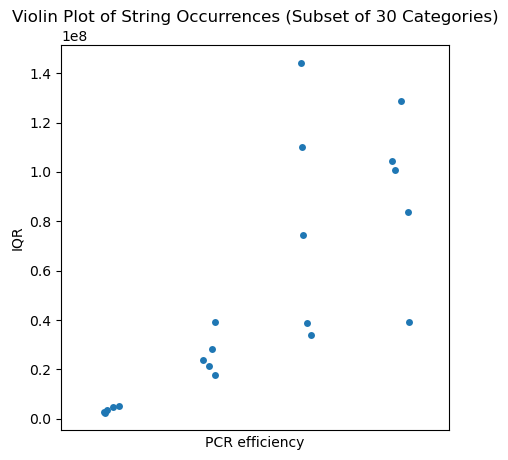

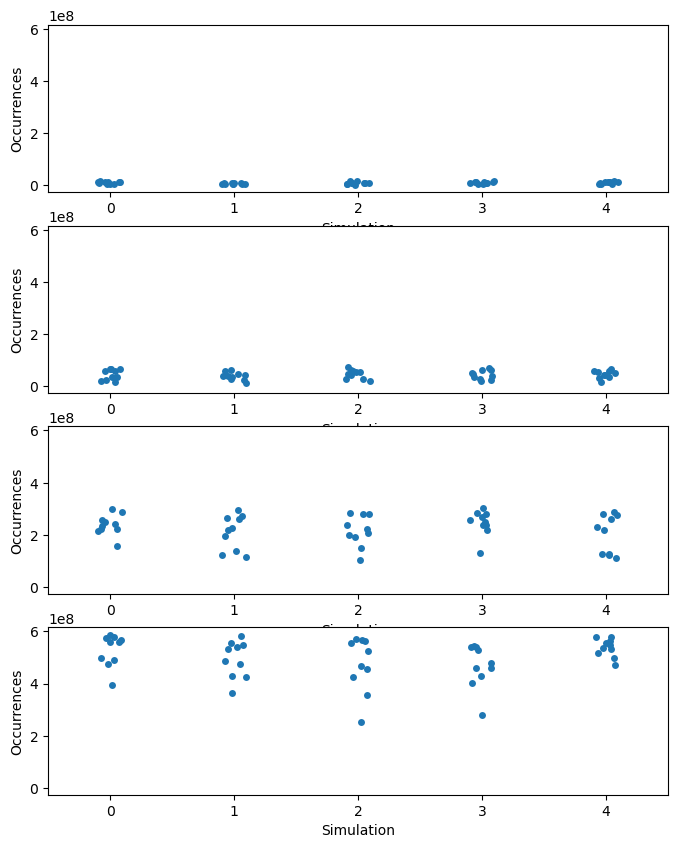

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def iqr_for_df(df, num_sim):
    
    iqr_tracker = np.zeros(num_sim+1)
    
    for int in range(num_sim+1):
        values_df = df[df['Simulation']==int]
        
        iqr_values = np.percentile(values_df["Occurrences"], [75, 25], axis=0)
        iqr = iqr_values[0] - iqr_values[1]
        
        iqr_tracker[int] = iqr

    return iqr_tracker

sim_subset = [0,1,2,3,4]
sim_var_same = pd.read_csv('sim_df/variation_umi_stripplot.tsv', sep='\t')
sim_var_70eff = sim_var_same[sim_var_same['Simulation'].isin(sim_subset)]
sim_var_80eff = pd.read_csv('sim_df/umi_stripplot_80eff.tsv', sep='\t')
sim_var_90eff = pd.read_csv('sim_df/umi_stripplot_90eff.tsv', sep='\t')
sim_var_95eff = pd.read_csv('sim_df/umi_stripplot_95eff.tsv', sep='\t')

num_sim = 4
iqr_70 = iqr_for_df(sim_var_70eff,num_sim)
#iqr_mean_70 = np.mean(iqr_70)
#iqr_std_dev_70 = np.std(iqr_70)
iqr_80 = iqr_for_df(sim_var_80eff,num_sim)
iqr_90 = iqr_for_df(sim_var_90eff,num_sim)
iqr_95 = iqr_for_df(sim_var_95eff,num_sim)

iqr = []
iqr.extend(iqr_70)
iqr.extend(iqr_80)
iqr.extend(iqr_90)
iqr.extend(iqr_95)

df = {
    'PCR efficiency': ['70'] * (num_sim+1) + ['80'] * (num_sim+1) + ['90'] * (num_sim+1) + ['95%'] * (num_sim+1),
    'IQR': iqr
}

print(df)

plt.figure(figsize=(5, 5))
sns.stripplot(data=df, x='PCR efficiency', y='IQR',jitter=True)
plt.xticks([])
plt.title('Violin Plot of String Occurrences (Subset of 30 Categories)')
#plt.savefig('variation_umi_stripplot.png')


#Plot the actual data
fig, axs = plt.subplots(4, 1, sharey=True, figsize=(8, 10))

sns.stripplot(ax=axs[0],data=sim_var_70eff,x='Simulation', y='Occurrences')
sns.stripplot(ax=axs[1],data=sim_var_80eff,x='Simulation', y='Occurrences')
sns.stripplot(ax=axs[2],data=sim_var_90eff,x='Simulation', y='Occurrences')
sns.stripplot(ax=axs[3],data=sim_var_95eff,x='Simulation', y='Occurrences')

In [ ]:
sim_var_5cycles = pd.read_csv('sim_df/umi_stripplot_5cycles.tsv', sep='\t')
sim_var_10cycles = pd.read_csv('sim_df/umi_stripplot_10cycles.tsv', sep='\t')
sim_var_20cycles = pd.read_csv('sim_df/umi_stripplot_20cycles.tsv', sep='\t')